In [1]:
import wandb
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [2]:
api = wandb.Api()

In [3]:
entity = "evangeorgerex"
project = "fwal"

In [61]:
run_id = "5k4s8cmb"

In [62]:
run = api.run(f"{entity}/{project}/{run_id}")


In [6]:

def get_mnar_data(run):
    '''
    returns:
        float: optimal test-time intervention validation f1
        float: optimal test-time intervention test f1
        float: full test-time intervention validation f1
        float: full test-time intervention test f1
    '''

    history_dict = {}
    
    
            # 'fraction_missing_features_MCAR'+logging_key: fraction,
            # 'MCAR_imputation_valid_metrics'+logging_key: valid_metrics,
            # 'MCAR_imputation_test_metrics'+logging_key: test_metrics

    # Iterate through the run history to extract the desired metrics
    keys = [
        "fraction_missing_features_MNAR",
        "feature_selection_valid_metrics.F1_weighted", "feature_selection_test_metrics.F1_weighted", 
        ]
    for row in run.scan_history():
        # print('.')
        # Check if both keys exist in the current row
        for key in keys:
            if key in row and row[key] is not None:
                if key not in history_dict:
                    history_dict[key] = []
                history_dict[key].append(row[key])
            # else:
            #     # print(key)
            #     continue
    return history_dict

def get_mcar_data(run):
    '''
    returns:
        float: optimal test-time intervention validation f1
        float: optimal test-time intervention test f1
        float: full test-time intervention validation f1
        float: full test-time intervention test f1
    '''

    history_dict = {}
    
    
            # 'fraction_missing_features_MCAR'+logging_key: fraction,
            # 'MCAR_imputation_valid_metrics'+logging_key: valid_metrics,
            # 'MCAR_imputation_test_metrics'+logging_key: test_metrics

    # Iterate through the run history to extract the desired metrics
    keys = [
        "fraction_missing_features_MCAR",
        "MCAR_imputation_valid_metrics.F1_weighted", "MCAR_imputation_test_metrics.F1_weighted", 
        ]
    for row in run.scan_history():
        # print('.')
        # Check if both keys exist in the current row
        for key in keys:
            if key in row and row[key] is not None:
                if key not in history_dict:
                    history_dict[key] = []
                history_dict[key].append(row[key])
            # else:
            #     # print(key)
            #     continue
    return history_dict

def plot_mcar_vs_mnar(mcar_data, mnar_data):
    '''
    Plots the test-time intervention F1 scores for MCAR and MNAR missing data
    '''
    # Create a pandas dataframe from the data
    mcar_df = pd.DataFrame(mcar_data)
    mnar_df = pd.DataFrame(mnar_data)

    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=mcar_df, x="fraction_missing_features_MCAR", y="MCAR_imputation_test_metrics.F1_weighted", label="MCAR")
    sns.lineplot(data=mnar_df, x="fraction_missing_features_MNAR", y="feature_selection_test_metrics.F1_weighted", label="MNAR")
    plt.xlabel("Fraction of missing features")
    plt.ylabel("F1 score")
    plt.title("F1 score for MCAR and MNAR missing data")
    plt.legend()
    plt.show()


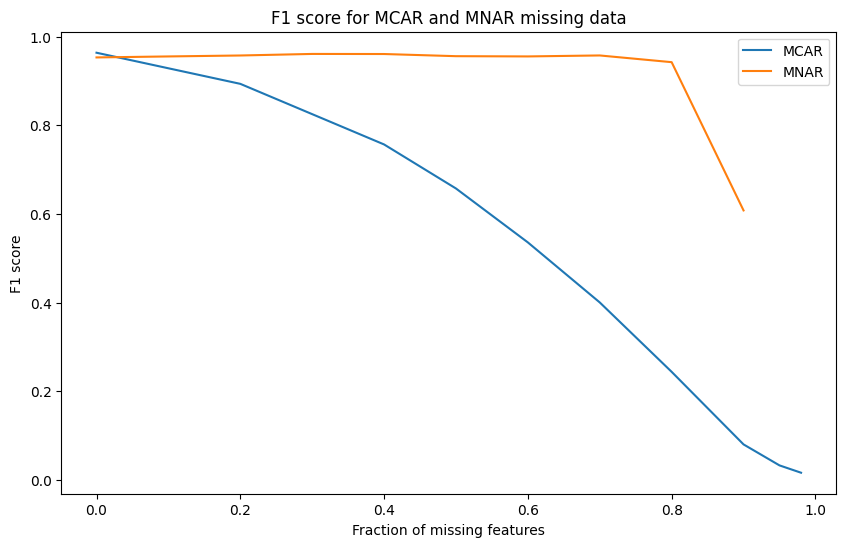

In [63]:
mcar_data = get_mcar_data(run)
mnar_data = get_mnar_data(run)
plot_mcar_vs_mnar(mcar_data, mnar_data)

In [24]:
history_dict = get_mcar_data(run)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_run_data(run):
    """
    Extracts both MCAR and MNAR data for a given run.
    """
    mcar_data = get_mcar_data(run)
    mnar_data = get_mnar_data(run)
    return mcar_data, mnar_data

def get_sweep_runs(api, entity, project, sweep_id):
    """
    Retrieves and processes all runs within a given sweep.
    """
    sweep_runs = api.sweep(f"{entity}/{project}/{sweep_id}").runs
    all_run_data = {}
    for run in sweep_runs:
        run_id = run.id
        mcar_data, mnar_data = get_run_data(run)
        all_run_data[run_id] = {
            'mcar': mcar_data,
            'mnar': mnar_data,
            'dataset': run.config['dataset']  # assuming dataset info is stored in run configuration
        }
    return all_run_data

def aggregate_data_by_dataset(all_run_data):
    """
    Aggregates run data by dataset.
    """
    dataset_data = {}
    for run_id, data in all_run_data.items():
        dataset_name = data['dataset']
        if dataset_name not in dataset_data:
            dataset_data[dataset_name] = {'mcar': [], 'mnar': []}
        dataset_data[dataset_name]['mcar'].append(data['mcar'])
        dataset_data[dataset_name]['mnar'].append(data['mnar'])
    return dataset_data

def plot_dataset_mnar(dataset_data, dataset_name):
    """
    Plots MNAR data for a specific dataset.
    """
    data = pd.concat([pd.DataFrame(d) for d in dataset_data[dataset_name]['mnar']])
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x="fraction_missing_features_MNAR", y="feature_selection_test_metrics.F1_weighted", label="MNAR")
    plt.xlabel("Fraction of Missing Features")
    plt.ylabel("F1 Score")
    plt.title(f"F1 Score for MNAR Missing Data in Dataset: {dataset_name}")
    plt.legend()
    plt.show()
    
def plot_dataset_mcar(dataset_data, dataset_name):
    """
    Plots MNAR data for a specific dataset.
    """
    data = pd.concat([pd.DataFrame(d) for d in dataset_data[dataset_name]['mcar']])
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x="fraction_missing_features_MCAR", y="MCAR_imputation_test_metrics.F1_weighted", label="MCAR")
    plt.xlabel("Fraction of Missing Features")
    plt.ylabel("F1 Score")
    plt.title(f"F1 Score for MCAR Missing Data in Dataset: {dataset_name}")
    plt.legend()
    plt.show()




In [8]:

sweep_id = '8a09w5x3'
all_run_data = get_sweep_runs(api, entity, project, sweep_id)
dataset_data = aggregate_data_by_dataset(all_run_data)


In [10]:
all_run_data

{'xn3aq3qa': {'mcar': {'fraction_missing_features_MCAR': [0,
    0.2,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    0.95,
    0.98],
   'MCAR_imputation_valid_metrics.F1_weighted': [0.2567274581389971,
    0.24391329410669502,
    0.2245133208892116,
    0.21696914973000858,
    0.2288329302304085,
    0.19174580135452002,
    0.20073854250031373,
    0.1825584965901122,
    0.17225329897110367,
    0.16507138232936144],
   'MCAR_imputation_test_metrics.F1_weighted': [0.27384253078712395,
    0.2454409815528308,
    0.22071380175316513,
    0.21961033486577594,
    0.20991608305433804,
    0.2134206772835371,
    0.19247270374327355,
    0.1787236092815331,
    0.1637619971681932,
    0.17198361031679832]},
  'mnar': {'fraction_missing_features_MNAR': [0,
    0.1,
    0.2,
    0.30000000000000004,
    0.4,
    0.5,
    0.6000000000000001,
    0.7000000000000001,
    0.8,
    0.9],
   'feature_selection_valid_metrics.F1_weighted': [0.26478040119859575,
    0.2656253465115002

In [9]:
dataset_data

{'poly_binarised_decimalised_synth': {'mcar': [{'fraction_missing_features_MCAR': [0,
     0.2,
     0.4,
     0.5,
     0.6,
     0.7,
     0.8,
     0.9,
     0.95,
     0.98],
    'MCAR_imputation_valid_metrics.F1_weighted': [0.2567274581389971,
     0.24391329410669502,
     0.2245133208892116,
     0.21696914973000858,
     0.2288329302304085,
     0.19174580135452002,
     0.20073854250031373,
     0.1825584965901122,
     0.17225329897110367,
     0.16507138232936144],
    'MCAR_imputation_test_metrics.F1_weighted': [0.27384253078712395,
     0.2454409815528308,
     0.22071380175316513,
     0.21961033486577594,
     0.20991608305433804,
     0.2134206772835371,
     0.19247270374327355,
     0.1787236092815331,
     0.1637619971681932,
     0.17198361031679832]},
   {'fraction_missing_features_MCAR': [0,
     0.2,
     0.4,
     0.5,
     0.6,
     0.7,
     0.8,
     0.9,
     0.95,
     0.98],
    'MCAR_imputation_valid_metrics.F1_weighted': [0.16817438637253238,
     0.1630

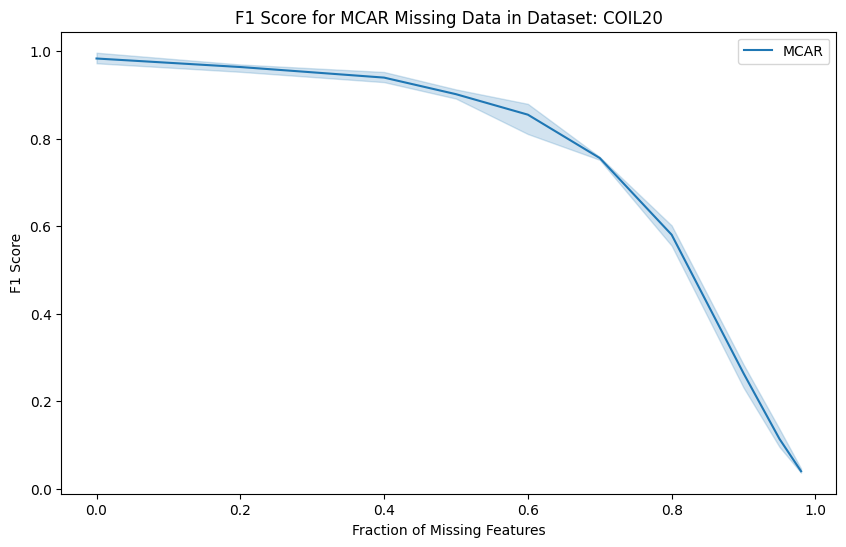

In [44]:
plot_dataset_mcar(dataset_data, 'COIL20')

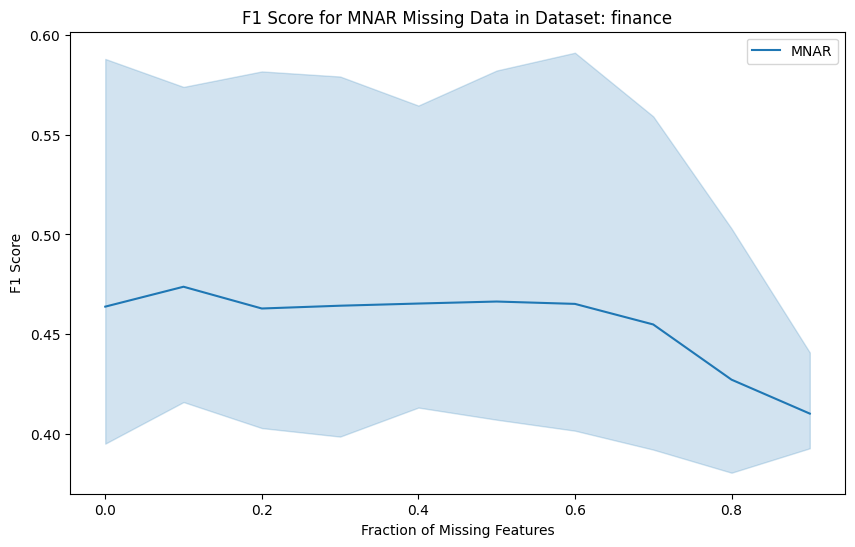

In [50]:
plot_dataset_mnar(dataset_data, 'finance')

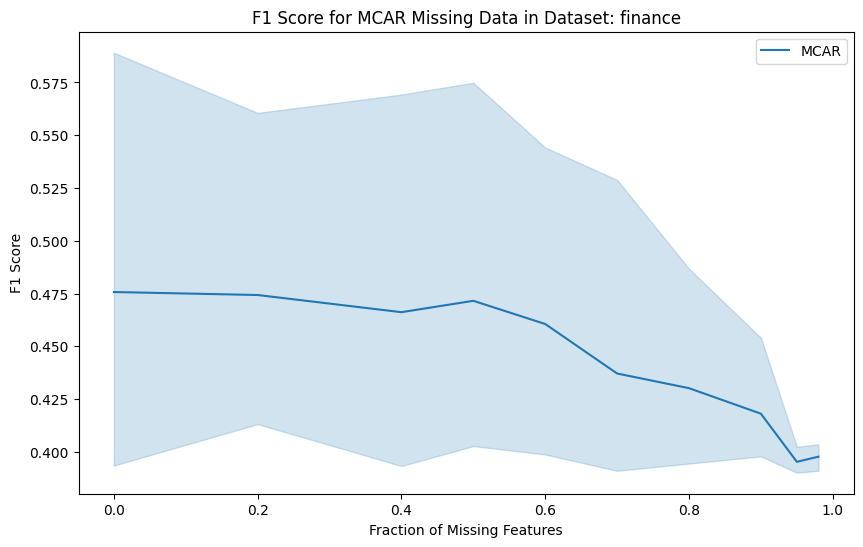

In [51]:
plot_dataset_mcar(dataset_data, 'finance')

In [57]:
dataset_data

{'poly_binarised_decimalised_synth': {'mcar': [{'fraction_missing_features_MCAR': [0,
     0.2,
     0.4,
     0.5,
     0.6,
     0.7,
     0.8,
     0.9,
     0.95,
     0.98],
    'MCAR_imputation_valid_metrics.F1_weighted': [0.2567274581389971,
     0.24391329410669502,
     0.2245133208892116,
     0.21696914973000858,
     0.2288329302304085,
     0.19174580135452002,
     0.20073854250031373,
     0.1825584965901122,
     0.17225329897110367,
     0.16507138232936144],
    'MCAR_imputation_test_metrics.F1_weighted': [0.27384253078712395,
     0.2454409815528308,
     0.22071380175316513,
     0.21961033486577594,
     0.20991608305433804,
     0.2134206772835371,
     0.19247270374327355,
     0.1787236092815331,
     0.1637619971681932,
     0.17198361031679832]},
   {'fraction_missing_features_MCAR': [0,
     0.2,
     0.4,
     0.5,
     0.6,
     0.7,
     0.8,
     0.9,
     0.95,
     0.98],
    'MCAR_imputation_valid_metrics.F1_weighted': [0.16817438637253238,
     0.1630

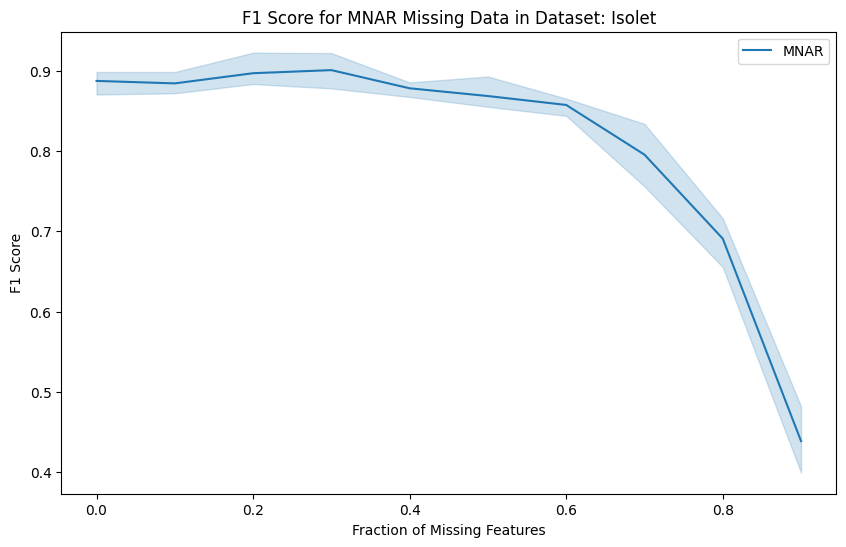

In [58]:
plot_dataset_mnar(dataset_data, 'Isolet')

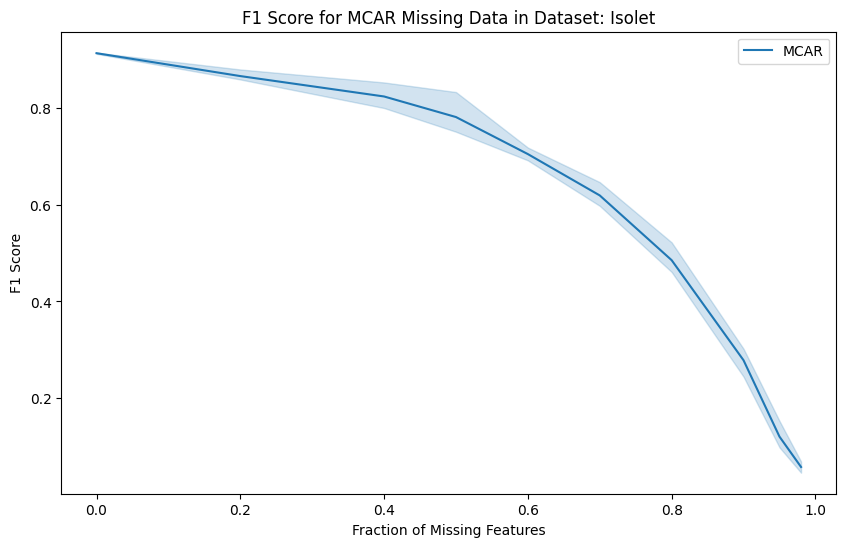

In [59]:
plot_dataset_mcar(dataset_data, 'Isolet')